12.Apply boosting, bagging, and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import os 

UP_DIR = '/Users/isabellachittumuri/Documents/Hunter College/Fall 2020/Stat 724/Jupyter/'
csv_file = os.path.join(UP_DIR,'OJ.csv')

OJ = pd.read_csv(csv_file, header=0, index_col=0, squeeze=True)
OJ.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
# Make categorical outputs numerical
OJ['Store7'] = OJ.Store7.map({'Yes':1,'NO':0})
OJ['Purchase'] = OJ.Purchase.map({'CH':1,'MM':0})
OJ['Purchase'].value_counts()

1    653
0    417
Name: Purchase, dtype: int64

Numerical and graphical summaries of the OJ data

In [4]:
# Statistical summary 
OJ.describe()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,356.0,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.610280,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,1.0,0.059298,0.027314,0.217991,1.630841
std,0.487915,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.0,0.101760,0.062232,0.107535,1.430387
min,0.000000,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,1.0,0.000000,0.000000,0.140000,0.000000
50%,1.000000,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,1.0,0.000000,0.000000,0.240000,2.000000
75%,1.000000,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,1.0,0.112676,0.000000,0.300000,3.000000
max,1.000000,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,1.0,0.402010,0.252688,0.440000,4.000000


In [5]:
# Pairwise Correlation
OJ.corr()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
Purchase,1.000000,0.125572,0.252625,0.023021,0.149180,0.181249,-0.166921,0.132751,-0.174784,0.640582,0.220584,-0.132126,0.275022,NaN,-0.166459,0.182201,0.164599,-0.124573
WeekofPurchase,0.125572,1.000000,0.096046,0.704324,0.576872,0.365722,0.242334,0.107866,0.070688,0.192897,0.101719,0.201256,-0.011610,NaN,0.223533,0.355047,0.053038,-0.053652
StoreID,0.252625,0.096046,1.000000,0.020815,0.093344,0.333182,0.010619,0.379360,-0.171641,0.237333,0.040655,-0.258172,0.174144,NaN,0.014302,0.334715,0.096913,-0.531597
PriceCH,0.023021,0.704324,0.020815,1.000000,0.616402,0.151900,0.116310,-0.099056,-0.018026,0.077793,0.229383,0.586716,-0.096335,NaN,0.099157,0.134601,-0.177935,0.399570
PriceMM,0.149180,0.576872,0.093344,0.616402,1.000000,0.065206,-0.001246,-0.031281,-0.068340,0.115570,0.532859,0.384941,0.292594,NaN,-0.021747,0.059964,0.665187,0.106612
DiscCH,0.181249,0.365722,0.333182,0.151900,0.065206,1.000000,0.018035,0.534775,-0.046952,0.139400,0.019416,-0.711274,0.393615,NaN,0.014718,0.999022,-0.062551,-0.243812
DiscMM,-0.166921,0.242334,0.010619,0.116310,-0.001246,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.846868,0.067940,-0.823908,NaN,0.998793,0.018521,-0.111848,-0.125917
SpecialCH,0.132751,0.107866,0.379360,-0.099056,-0.031281,0.534775,0.156636,1.000000,-0.154170,0.137058,-0.149182,-0.508586,0.129713,NaN,0.160750,0.549015,0.054838,-0.321847
SpecialMM,-0.174784,0.070688,-0.171641,-0.018026,-0.068340,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.430499,0.025648,-0.414135,NaN,0.466546,-0.051138,-0.068311,-0.083691
LoyalCH,0.640582,0.192897,0.237333,0.077793,0.115570,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.078631,-0.058887,0.104261,NaN,-0.022460,0.138684,0.070659,-0.103126


From the pairwise correlation, we can confirm a strong positive correlation between Purchase and LoyalCH with a value of 0.641. There is also weak positive correlations between Purchase and PriceDiff. As well as weak negative correlation between Purchase and PctDiscCH. All the postive correlations in the Purchase column indicit a positive outcome to CH, while the negative correlations indicate a positive outcome to MM.

In [6]:
X = OJ[['LoyalCH','PriceDiff']].values
y = np.log(OJ.Purchase.values)

<ipython-input-6-13f2246e517e>:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(OJ.Purchase.values)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1070, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Note: 80% of data in weekly_train, 20% of data in weekly_test
print('train size: {0}  test size {1}'.format(X_train.shape[0],X_test.shape[0]))

train size: 802  test size 268


## Setup

In [9]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Bagging ensembles

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9216417910447762


In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.8694029850746269


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


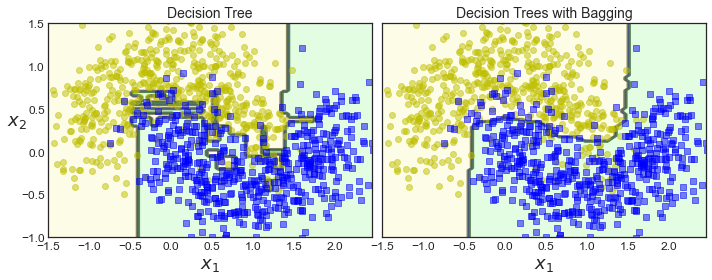

In [14]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

# Random Forests

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

In [16]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.9701492537313433

## Out-of-Bag evaluation

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9077306733167082

In [20]:
#bag_clf.oob_decision_function_

In [21]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8880597014925373

## Feature importance - images

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [23]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [24]:
mnist["data"].shape

(70000, 784)

In [25]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


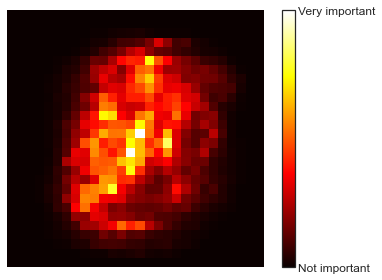

In [26]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

# Gradient Boosting - regression

In [64]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [65]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [66]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [67]:
X_new = np.array([[0.8]])

In [68]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1))

TypeError: 'DecisionTreeRegressor' object is not iterable

In [32]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

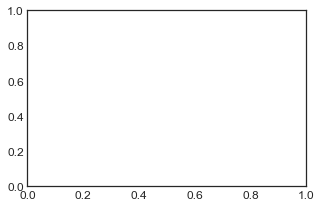

In [33]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

## Gradient Boosting with Early stopping


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=119, random_state=42)

In [35]:
min_error = np.min(errors)

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 1 

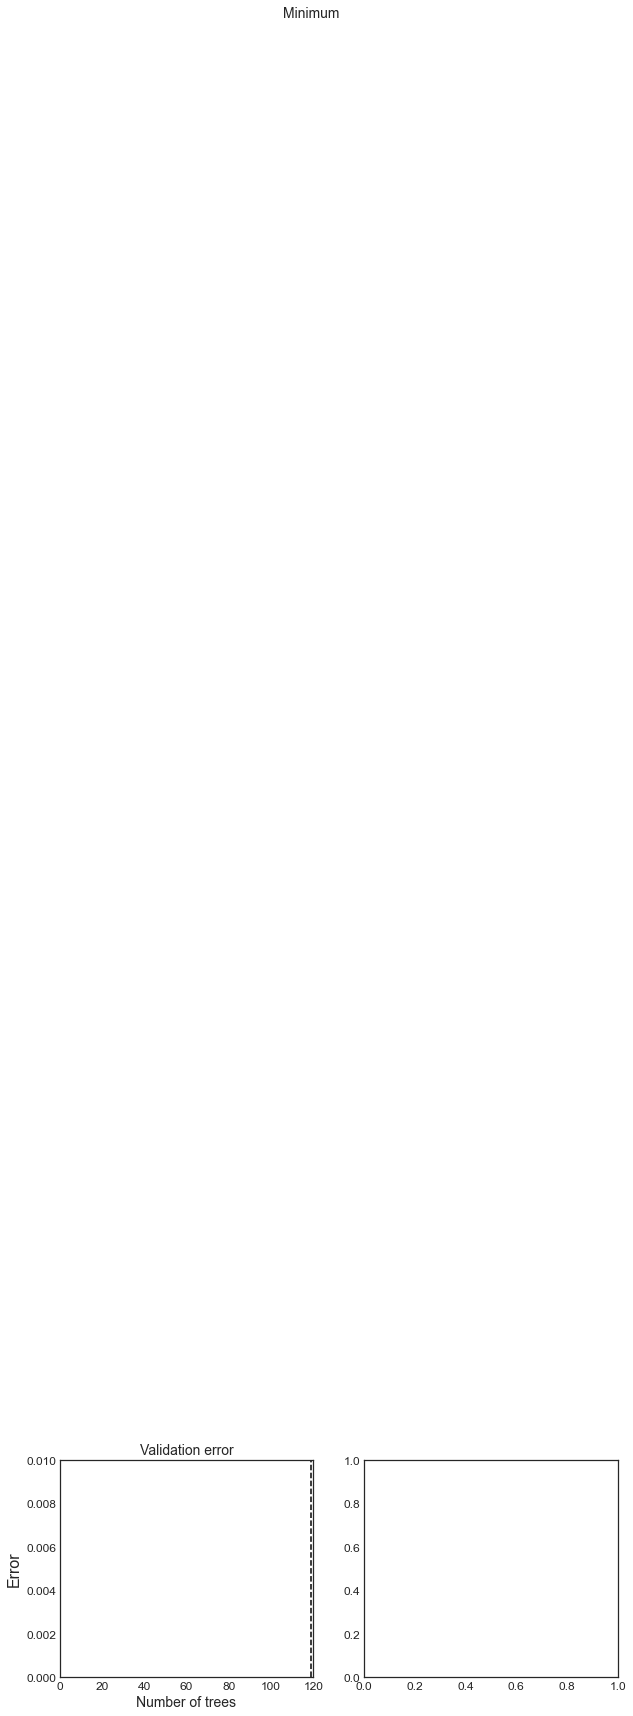

In [36]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

save_fig("early_stopping_gbrt_plot")
plt.show()

## Decision Trees : Bagging and Random Forests

In [37]:
# There are 13 features in the dataset
X.shape

(1070, 2)

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=2, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=2, random_state=1)

Text(0, 0.5, 'y_test')

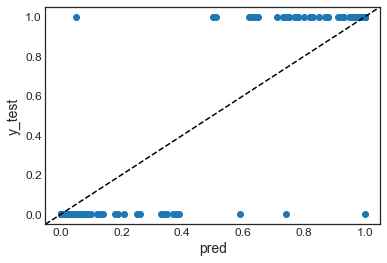

In [39]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [40]:
mean_squared_error(y_test, pred)

0.02199477611940298

In [41]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 8.3.4 Boosting

In [42]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

In [56]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [57]:
mean_squared_error(y_test, regr.predict(X_test))

0.050055825045824585

## Using XGBoost

In [58]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.


In [59]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error)           # Not shown

In [60]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

In [61]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

40.7 ns ± 0.55 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [62]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

65.1 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Logistic Regression

In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import make_blobs

%matplotlib inline
plt.style.use('seaborn-white')

In [72]:
# Create logistic regression model using train data (Statsmodel)
logit_mod = sm.Logit(y_train,X_train)
logit_res = logit_mod.fit()
print(logit_res.summary2())

Optimization terminated successfully.
         Current function value: 0.333538
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.519      
Dependent Variable: y                AIC:              538.9945   
Date:               2020-10-30 22:49 BIC:              548.3687   
No. Observations:   802              Log-Likelihood:   -267.50    
Df Model:           1                LL-Null:          -555.81    
Df Residuals:       800              LLR p-value:      2.0242e-127
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1     1.3660      0.1199     11.3929    0.0000     1.1310     1.6010
x2    -3.6063      0.2718    -13.2664    

In [74]:
# From results, create matrix to see values more clearly 
# Statistically significant predictors have p-values < alpha levels 0.05 or 0.10 
pd.DataFrame({"Estimate": logit_res.params, "Std. Error": logit_res.bse, "z value": logit_res.tvalues,
             "Pr(>|z|)": logit_res.pvalues})

,Estimate,Std. Error,z value,Pr(>|z|)
0,1.365991,0.119898,11.392907,4.536007e-30
1,-3.606321,0.271838,-13.266423,3.624723e-40
